In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
data = pd.read_csv('flex.csv')

In [2]:
data['time'].values

array(['2021-01-01 00:00', '2021-01-01 00:15', '2021-01-01 00:30', ...,
       '2022-05-31 23:15', '2022-05-31 23:30', '2022-05-31 23:45'],
      dtype=object)

In [3]:
data['time'] = pd.to_datetime(data['time'])
df = data[data['time'].dt.year == 2021]

# How much Wind/PV Power was forecasted to produced in German in 2021 [in MWh] on Day Ahead (da) and on Intraday (id)?

This can be answered by adding the values of each of the columns 3, 4,5,6 and then multiplying the resultant value by 0.25 since 15mins=0.25hr

In [4]:
print('Amount of Wind power produced on id is:')
(df['de_emsys_wind_onoff_id [in MW]'].sum())*0.25

Amount of Wind power produced on id is:


113478034.5

In [5]:
print('Amount of Wind power forecasted on da is:')
(df['de_emsys_wind_onoff_da [in MW]'].sum())*0.25

Amount of Wind power forecasted on da is:


115395406.25

In [6]:
print('Amount of PV power produced on id is:')
(df['de_emsys_pv_da [in MW]'].sum())*0.25

Amount of PV power produced on id is:


46094572.75

In [7]:
print('Amount of PV power forecasted on da is:')
(df['de_emsys_pv_id [in MW]'].sum())*0.25

Amount of PV power forecasted on da is:


46689891.5

# Find the Day with the highest renewable energy production and with the lowest renewable energy production in 2021. What was the avaerage Day Ahead Price levels on these days? How do you explain the difference in prices?

In [8]:
#df.filter(['hour', 'time', 'de_emsys_wind_onoff_id [in MW]'])
#print(df[df['de_emsys_wind_onoff_id [in MW]'] == df['de_emsys_wind_onoff_id [in MW]'].max()])

In [9]:
data_s=df.groupby([df['time'].dt.date])
data_s

In [10]:
data_sum= df.groupby([df['time'].dt.date]).sum().reset_index()

In [11]:
print('Highest amount of PV was produced on:')
data_sum[data_sum['de_emsys_pv_id [in MW]'] == data_sum['de_emsys_pv_id [in MW]'].max()]['time']

Highest amount of PV was produced on:


164    2021-06-14
Name: time, dtype: object

In [12]:
print('Lowest amount of PV was produced on:')
data_sum[data_sum['de_emsys_pv_id [in MW]'] == data_sum['de_emsys_pv_id [in MW]'].min()]['time']

Lowest amount of PV was produced on:


3    2021-01-04
Name: time, dtype: object

In [13]:
print('Highest amount of Wind power was produced on:')
data_sum[data_sum['de_emsys_wind_onoff_id [in MW]'] == data_sum['de_emsys_wind_onoff_id [in MW]'].max()]['time']

Highest amount of Wind power was produced on:


69    2021-03-11
Name: time, dtype: object

In [14]:
print('Lowest amount of Wind power was produced on:')
data_sum[data_sum['de_emsys_wind_onoff_id [in MW]'] == data_sum['de_emsys_wind_onoff_id [in MW]'].min()]['time']

Lowest amount of Wind power was produced on:


176    2021-06-26
Name: time, dtype: object

In [15]:
data_ave = df.groupby([df['time'].dt.date]).mean().reset_index()

In [16]:
print('on 2021-06-26 the average da of wind power price is:')
print(data_ave.iloc[176]['da h [in EUR/MWh]'])
print('It was less windy as it was summer, that accounted for less production and higher price')

on 2021-06-26 the average da of wind power price is:
79.87499999999994
It was less windy as it was summer, that accounted for less production and higher price


In [17]:
print('on 2021-03-11 the average da price of wind power is:')
print(data_ave.iloc[69]['da h [in EUR/MWh]'])
print('It was windy, so they were able to produce more energy and sold for cheaper price')

on 2021-03-11 the average da price of wind power is:
27.43083333333333
It was windy, so they were able to produce more energy and sold for cheaper price


In [18]:
print('on 2021-06-14 the average da price of PV power is:')
print(data_ave.iloc[164]['da h [in EUR/MWh]'])
print('It was sunny on this day, so they produced more and sold high probably due to higher demand')

on 2021-06-14 the average da price of PV power is:
74.22250000000001
It was sunny on this day, so they produced more and sold high probably due to higher demand


In [19]:
print('on 2021-01-04 the average da price of PV power is:')
print(data_ave.iloc[3]['da h [in EUR/MWh]'])
print('They produced because less sunny compared to June and sold cheap probably there was very little demand as customers may be aware there will be less production due to the season')

on 2021-01-04 the average da price of PV power is:
48.017916666666714
They produced because less sunny compared to June and sold cheap probably there was very little demand as customers may be aware there will be less production due to the season


# What was the average value [in EUR/MWh] for Wind/Solar Power in 2021 using the da forecast and using da h prices. Is the average value of Wind and PV higher or lower than the average da price? Why could it be higher/lower?

In [20]:
df['da h [in EUR/MWh]'].mean()

96.84991780821863

In [21]:
df['id_h_p  [in EUR/MWh]'].mean()

97.98846575342345

The average value of Wind/pv is higher than that of average da price due to inflation 

# Show the average Wind/Solar production for 2021 over a normalized 24h day for Intraday id and Day Ahead da (4 lines in one graph)

In [22]:
df_new = data_ave.iloc[:, [2,3,4,5]]
def standardscaling(series):
    return (series - series.mean()) / (series.std())
for col in df_new.columns:
    df_new[col] = standardscaling(df_new[col])
#print(df_new)

C:\Users\Hafees Yusuff\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


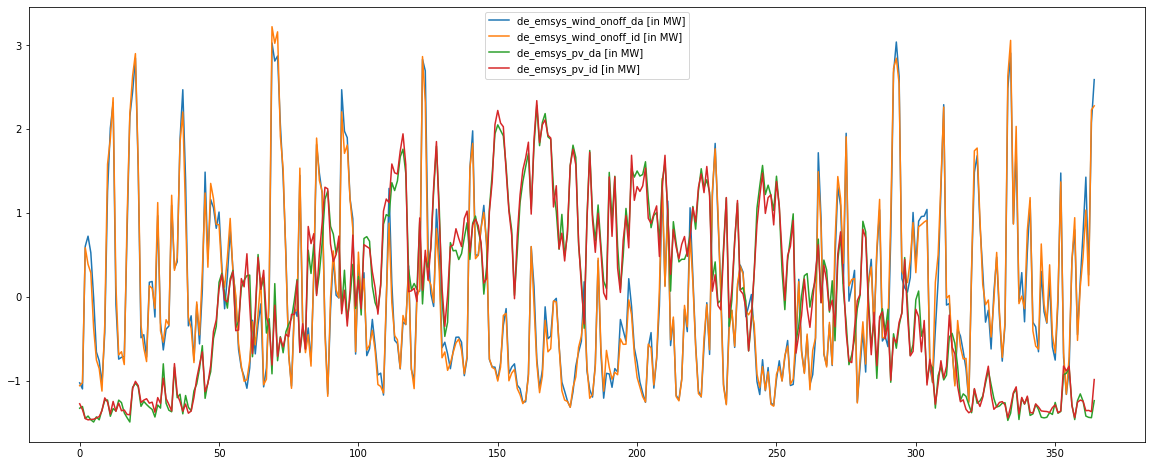

In [23]:
df_new.plot(figsize = (20, 8))